In [16]:
from google.colab import files
new = files.upload()

Saving banana_quality.csv to banana_quality (1).csv


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy import stats
import plotly.express as px



In [17]:
with open("banana_quality.csv", "r") as new_file:
  nanadf = pd.read_csv(new_file)

nanadf

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [19]:
#i have done a check here to reconfirm that the scaled data is possibly standardized.
num_df = nanadf.iloc[:, :7]

mean_values = num_df.mean()
std_dev_values = num_df.std()

print("Mean of each column:")
print(mean_values)
print("\nStandard Deviation of each column:")
print(std_dev_values)


Mean of each column:
Size          -0.747802
Weight        -0.761019
Sweetness     -0.770224
Softness      -0.014441
HarvestTime   -0.751288
Ripeness       0.781098
Acidity        0.008725
dtype: float64

Standard Deviation of each column:
Size           2.136023
Weight         2.015934
Sweetness      1.948455
Softness       2.065216
HarvestTime    1.996661
Ripeness       2.114289
Acidity        2.293467
dtype: float64


In [67]:
nanadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 500.1 KB


In [5]:
for i in nanadf.columns:
  nan = nanadf[i].isnull().sum()
  print(f"The column {i} has {nan} null values")

The column Size has 0 null values
The column Weight has 0 null values
The column Sweetness has 0 null values
The column Softness has 0 null values
The column HarvestTime has 0 null values
The column Ripeness has 0 null values
The column Acidity has 0 null values
The column Quality has 0 null values


In [6]:
numeric_df = nanadf.iloc[:, :7]
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')
numeric_df
for i in numeric_df.columns:
  nan = nanadf[i].isnull().sum()
  print(f"The column {i} has {nan} null values") #with this i confirm that there are no null values in the dataframe or non numeric values in any of the numerical columns

The column Size has 0 null values
The column Weight has 0 null values
The column Sweetness has 0 null values
The column Softness has 0 null values
The column HarvestTime has 0 null values
The column Ripeness has 0 null values
The column Acidity has 0 null values


In [36]:
for i in nanadf.columns[0:7]:
  fig_box = px.box(nanadf,y = i, color='Quality',       #interactive EDA plots
                   title=f'Box Plot of {i} by Quality',
                   labels={i: i, 'Quality': 'Quality'})
  fig_box.show()


In [35]:
for i in nanadf.columns[0:7]:
  fig_violin = px.violin(nanadf, x= i, color='Quality',
                         title=f'Violin Plot of {i} by Quality', #interactive EDA plots
                         labels={i: i, 'Quality': 'Quality'})
  fig_violin.show()



#Hypothesis testing:

##Hypothesis : There is a relationship between size and ripeness of banana
The null hypothesis $H_o$: No relationship between size and ripeness of banana

The alternate hypothesis $H_A$: A relationship exists between size and ripeness of banana

In [38]:
plot_scat = px.scatter(nanadf, x='Size', y='Ripeness', color='Quality',
                         title='Scatter plot depicting spread of Size vs. Ripeness of quality of banana',
                         labels={'Size': 'Size', 'Ripeness': 'Ripeness'})
plot_scat.show()

In [21]:
#Pearson Correlation Coefficient(r)
pearsonr_x_y = nanadf['Size'].corr(nanadf['Ripeness'])
print(f'The Pearson Correlation Coefficient between Weight and Ripeness of banana is {round(pearsonr_x_y,3)}')
pearsonr_y_x = nanadf['Ripeness'].corr(nanadf['Size'])
print(f'The Pearson Correlation Coefficient between Ripeness and Weight of banana is {round(pearsonr_y_x,3)}')

The Pearson Correlation Coefficient between Weight and Ripeness of banana is 0.043
The Pearson Correlation Coefficient between Ripeness and Weight of banana is 0.043


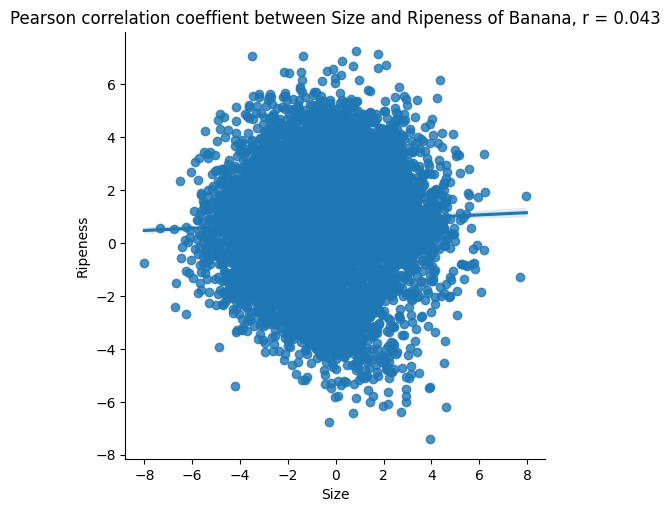

In [22]:
sns.lmplot(
    data=nanadf,
    x= 'Size',
    y= 'Ripeness'
).set(title=f"Pearson correlation coeffient between Size and Ripeness of Banana, r = {round(pearsonr_x_y,3)}");

In [25]:
import pandas as pd
import numpy as np

pearson_corr, p_value = stats.pearsonr(nanadf['Size'], nanadf['Ripeness'])
print(f'The pearson correlation coeffient for Size vs. Ripeness of Banana is {round(pearson_corr,3)}')
print(f'The p-value is {p_value}')

def pearsonr_ci(x, y, alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list, np.array, or pandas series
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''
    r, p = stats.pearsonr(x,y) # find the Pearson correlation coeffient and the p_value
    r_z = np.arctanh(r) # convert r value to z_score
    se = 1/np.sqrt(len(x)-3) # find the standard error
    z = stats.norm.ppf(1-alpha/2) # find the critical z-value for the alpha level
    lo_z, hi_z = r_z-z*se, r_z+z*se # calculate the confidience interval with the z_score
    lo, hi = np.tanh((lo_z, hi_z)) # convert the z_score confidence interval based on the r value.
    return lo, hi # return the confidience interval low and high values.

CI_lo, CI_hi = pearsonr_ci(nanadf['Size'], nanadf['Ripeness'])

print(f'The confidence interval of the Pearson correlation coefficient is ({round(CI_lo,4)}, {round(CI_hi,4)}).')

The pearson correlation coeffient for Size vs. Ripeness of Banana is 0.043
The p-value is 0.00013882978199822603
The confidence interval of the Pearson correlation coefficient is (0.0207, 0.0644).


Though the p-value is very small showing statistical significance, Pearson correlation coefficient displays a weak relationship between Size and Ripeness of Bananas.
Null hypothesis is cautiously rejected.

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

nanadf["Quality"] = le.fit_transform(nanadf["Quality"])
nanadf

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,0
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,0
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,0
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,0


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

x = nanadf.drop('Quality', axis=1)
y = nanadf['Quality']
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=37)
rf_class = RandomForestClassifier()
rf_class.fit(x_tr, y_tr)

fitted = rf_class.predict(x_te)


print("Classification Report:")
print(classification_report(y_te, fitted))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       805
           1       0.97      0.97      0.97       795

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



In [61]:
feat = pd.DataFrame(rf_class.feature_importances_, index = x.columns)
feat

,0
Size,0.140510
Weight,0.162063
Sweetness,0.165438
Softness,0.142209
HarvestTime,0.163372
Ripeness,0.144809
Acidity,0.081598


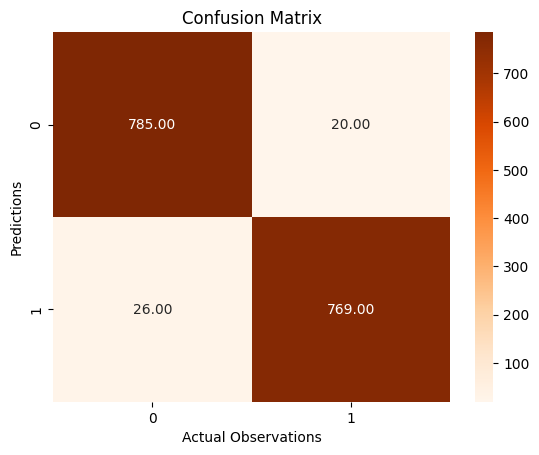

In [66]:
c_mat = confusion_matrix(y_te, fitted)
sns.heatmap(c_mat, annot=True,fmt= '.2f', cmap='Oranges')
plt.xlabel('Actual Observations')
plt.ylabel('Predictions')
plt.title('Confusion Matrix')
plt.show()